# Assignment 7


You will demonstrate your ability to create and train Neural Network models.

You will *only* use `Dense` layers.

# Objectives

This is a "doing" rather than "thinking" assignment.

Your goal is to checkpoint your skills to see if they are sufficient to create, train, and evaluate
Neural Network models.

# Submission guidelines

There are some specified tasks you must carry out, which involve playing around with a number of models.

We want to be able to evaluate *your best model* on a holdout dataset.

To faciliate this,
in addition to providing your notebook, we will ask you to create the subroutine `MyModel`
described below **and submit one additional file** to be described.

You will choose your *best model* and using the code provided in the cell below, save the model to a file and **submit the file with your saved model** along with the notebook.

The code cell below **should be the last cell in your notebook**.

The last cell:
- defines a routine to save a "model" object to a file
- defines a routine to load a model object from a file
- asks you to save the model for one of the tasks
- asks you to run `MyModel`

`MyModel` takes as arguments
- a test set: `x_test`, `y_test`
- name of a file containing a model object for a specified task

`MyModel` will load the file (i.e., restore the model) and run predictions on the test set.

You will need to complete the body of the `MyModel` definition.

We will run `MyModel` in that cell in order to load your saved model and run it
- We will not run any other cell in the notebook so if you need imports or anything else. put it there!  
- We **will not** run cells that train your model: that would take too long)
- If you need the holdout data to be transformed
    - the transformations should be called from `MyModel`
    - we will not run a cell to make the transformation happen

# HINT
**This is literally a give-away:** https://www.tensorflow.org/tutorials/keras/classification

## Additional submission

In addition to your notebook, please also submit the file whose name is stored in `model_path`.

**DO NOT** rename the file!


In [7]:
# PART 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

# PART 2: Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

In [8]:
# Task 1: One-layer neural network (logistic regression model)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model_one_layer = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))
])
model_one_layer.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])
model_one_layer.fit(x_train_flat, y_train, epochs=10, batch_size=128, verbose=1)
loss, accuracy = model_one_layer.evaluate(x_test_flat, y_test)
print(f"Task 1 - Test Accuracy: {accuracy:.4f}")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.6658 - loss: 1.0111
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.8230 - loss: 0.5287
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.8384 - loss: 0.4786
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8447 - loss: 0.4611
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8505 - loss: 0.4399
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8535 - loss: 0.4236
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8551 - loss: 0.4239
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8591 - loss: 0.4108
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.8587 - loss: 0.4123
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8614 - loss: 0.4045
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.8488 - loss: 0.4441
Task 1 - Test Accuracy: 0.8439


# Layers: 2, Units: 10 -> Test Accuracy: 0.8480
# Layers: 2, Units: 50 -> Test Accuracy: 0.8750
# Layers: 2, Units: 200 -> Test Accuracy: 0.8912
# Layers: 3, Units: 10 -> Test Accuracy: 0.8359
# Layers: 3, Units: 50 -> Test Accuracy: 0.8768
# Layers: 3, Units: 200 -> Test Accuracy: 0.8865
# Layers: 4, Units: 10 -> Test Accuracy: 0.8373
# Layers: 4, Units: 50 -> Test Accuracy: 0.8805
# Layers: 4, Units: 200 -> Test Accuracy: 0.8788

Accuracy Table (sorted):
   Hidden Layers  Units per Layer  Test Accuracy
0              2               10         0.8480
1              2               50         0.8750
2              2              200         0.8912
3              3               10         0.8359
4              3               50         0.8768
5              3              200         0.8865
6              4               10         0.8373
7              4               50         0.8805
8              4              200         0.8788


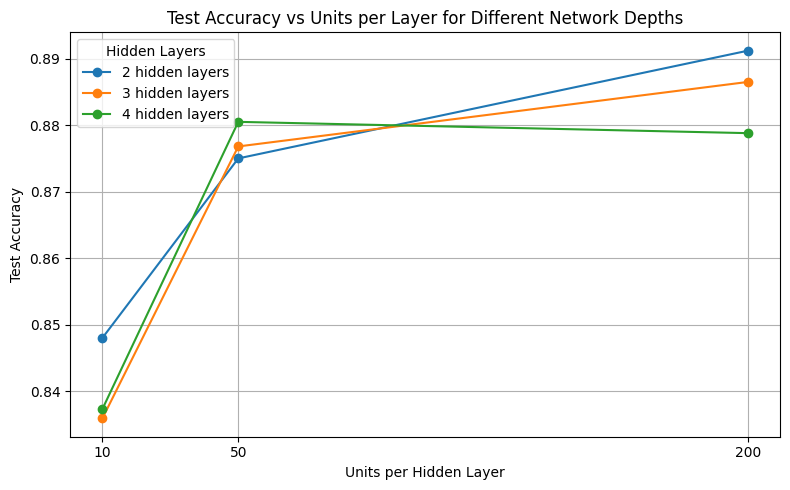

In [9]:
# PART 3: Define model configurations
units_options = [10, 50, 200]
layers_options = [2, 3, 4]  # as specified in assignment
accuracy_results = {}
# PART 4: Train and evaluate models
for hidden_layers in layers_options:
    for units in units_options:
        model = Sequential()
        for i in range(hidden_layers):
            if i == 0:
                model.add(Dense(units, activation='relu', input_shape=(784,)))
            else:
                model.add(Dense(units, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        model.fit(x_train_flat, y_train, epochs=10, batch_size=128, verbose=0)
        _, test_acc = model.evaluate(x_test_flat, y_test, verbose=0)
        accuracy_results[(hidden_layers, units)] = test_acc
        print(f"# Layers: {hidden_layers}, Units: {units} -> Test Accuracy: {test_acc:.4f}")

# PART 5: Display results in a table
results_df = pd.DataFrame([
    {"Hidden Layers": k[0], "Units per Layer": k[1], "Test Accuracy": v}
    for k, v in accuracy_results.items()
])
results_df = results_df.sort_values(by=["Hidden Layers", "Units per Layer"])
print("\nAccuracy Table (sorted):")
print(results_df)

# PART 6: Plot results
plt.figure(figsize=(8, 5))
for hidden_layers in layers_options:
    accs = [accuracy_results[(hidden_layers, u)] for u in units_options]
    plt.plot(units_options, accs, marker='o', label=f"{hidden_layers} hidden layers")

# PART 7: Format the plot
plt.title("Test Accuracy vs Units per Layer for Different Network Depths")
plt.xlabel("Units per Hidden Layer")
plt.ylabel("Test Accuracy")
plt.xticks(units_options)
plt.legend(title="Hidden Layers")
plt.grid(True)
plt.tight_layout()

# PART 8: Show the plot
plt.show()


Here is the cell **that must appear as the last cell in your notebook**

In [10]:
import os
from tensorflow.keras.models import load_model

import os
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

modelName = "assignment7_best_model"
model_path = os.path.join(".", modelName)   

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk (corrected filename!)
    model.save_weights(os.path.join(model_path, 'weights.weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))

def loadModel(model_path):
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.weights.h5'))
    return model


def MyModel(x_test, y_test, model_path):
    model = loadModel(model_path)
    x = x_test.astype("float32") / 255.0
    if len(x.shape) > 2:
        x = x.reshape((x.shape[0], -1))
    predictions = model.predict(x)
    return predictions

# Train and assign best model (Task 3.2: 2 hidden layers, 200 units)
my_model = Sequential([
    Dense(200, activation='relu', input_shape=(784,)),
    Dense(200, activation='relu'),
    Dense(10, activation='softmax')
])
my_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
my_model.fit(x_train_flat, y_train, epochs=10, batch_size=128, verbose=0)

saveModel(my_model, model_path)
predicts = MyModel(x_test, y_test, model_path)
print(predicts[:5])  # optional check


/Users/ardadinc/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Directory ./assignment7_best_model already exists, files will be over-written.
Model saved in directory ./assignment7_best_model; create an archive of this directory and submit with your assignment.
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
[[3.4909874e-02 2.3255337e-04 4.1689873e-03 1.3329238e-02 1.6091688e-04
  9.2920589e-01 1.2330634e-02 4.7110566e-03 8.0601906e-04 1.4487153e-04]
 [6.5991886e-02 3.1595660e-04 8.6782984e-03 2.2166381e-02 3.4592996e-04
  8.7219578e-01 2.4969304e-02 3.9719851e-03 1.1921462e-03 1.7235236e-04]
 [6.4951174e-02 4.4120697e-04 6.9621061e-03 3.0832700e-02 2.6938409e-04
  8.6730707e-01 2.1826284e-02 5.7296799e-03 1.4672352e-03 2.1322539e-04]
 [5.6174148e-02 3.8847947e-04 6.0501839e-03 2.6030382e-02 2.3089768e-04
  8.8553470e-01 1.9120125e-02 5.0841770e-03 1.1964150e-03 1.9053576e-04]
 [5.9461594e-02 3.1100860e-04 6.6813449e-03 2.2399785e-02 2.5392184e-04
  8.8383293e-01 2.1217320e-02 4.5039291e-03 1.1624474e-03 1.7575505e-04]]


# The problem

You will create several Neural Networks to solve a classification problem that is a slight variant
of the MNIST digit classification problem.

The assignment really involves little more than playing around with that example.

The objective is to ensure that you are able to write and run simple programs using Keras.

# The Data

The dataset is called Fashion MNIST.

Rather than classifying images into one of ten digits,
you will classify images of clothing items into one of ten classes.

Here's the code to get the data.

In [11]:
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


# Tasks

For each task
- create the Neural Network as specified
- train it on the training data set
- evaluate it on the test data set


## Task 1

Create a one layer Neural Network to perform classification (e.g., logistic regression) as we demonstrated in class.

No layers other than the one for classification.

# Task 2 (9 parts)

You will evaluate out of sample accuracy for several models and create a plot
- For number of layers in 2, 3,4 (more if you like)
- For number of units per layer in 10, 50, 200 (more if you like)
    - Using *same* number of units for each layer

The combination of choices for number of layers and number of units per layer gives you (at least) 9 models.

- Evaluate the out of sample accuracy for each of the 9 models.
- Present the results in a table (created by code)
- Create a *single plot*
    - Horizontal axis: number of units per layer
    - Vertical axis: out of sample accuracy
    - 3 traces in the plot, one for each choice of number of layers
        - e.g., one line in the plot for L=2, another line in the plot for L=3, and another line for L=4


# Extra credit
- Do a more extensive experiment
    - More layers
    - More choices for number of units per layer
    - Vary number of units per layer
        - Increase number of units with increasing layer number
        - Decrease number of units with increasing layer number
        - Find some other pattern for varying the number of units per layer
- Comment on when your models are either overfitting or underfitting
    - Use numeric justification
    

/Users/ardadinc/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


increasing, Depth=2, Units=[50, 100] => Train Acc: 0.8983, Test Acc: 0.8712, Gap: 0.0271
increasing, Depth=3, Units=[50, 100, 150] => Train Acc: 0.9021, Test Acc: 0.8775, Gap: 0.0246
increasing, Depth=4, Units=[50, 100, 150, 200] => Train Acc: 0.9041, Test Acc: 0.8805, Gap: 0.0236
increasing, Depth=5, Units=[50, 100, 150, 200, 250] => Train Acc: 0.9000, Test Acc: 0.8791, Gap: 0.0209
decreasing, Depth=2, Units=[100, 50] => Train Acc: 0.9048, Test Acc: 0.8804, Gap: 0.0244
decreasing, Depth=3, Units=[150, 100, 50] => Train Acc: 0.9096, Test Acc: 0.8834, Gap: 0.0262
decreasing, Depth=4, Units=[200, 150, 100, 50] => Train Acc: 0.9104, Test Acc: 0.8840, Gap: 0.0264
decreasing, Depth=5, Units=[250, 200, 150, 100, 50] => Train Acc: 0.9136, Test Acc: 0.8882, Gap: 0.0254
alternating, Depth=2, Units=[50, 200] => Train Acc: 0.8992, Test Acc: 0.8779, Gap: 0.0213
alternating, Depth=3, Units=[50, 200, 50] => Train Acc: 0.9029, Test Acc: 0.8804, Gap: 0.0225
alternating, Depth=4, Units=[50, 200, 50, 20

,Pattern,Depth,Units per Layer,Train Acc,Test Acc,Overfit Gap
8,alternating,2,"[50, 200]",0.8992,0.8779,0.0213
9,alternating,3,"[50, 200, 50]",0.9029,0.8804,0.0225
10,alternating,4,"[50, 200, 50, 200]",0.9015,0.8763,0.0252
11,alternating,5,"[50, 200, 50, 200, 50]",0.9004,0.8686,0.0318
12,constant_100,2,"[100, 100]",0.9074,0.8766,0.0307
13,constant_100,3,"[100, 100, 100]",0.9086,0.8837,0.0249
14,constant_100,4,"[100, 100, 100, 100]",0.9080,0.8799,0.0281
15,constant_100,5,"[100, 100, 100, 100, 100]",0.9053,0.8810,0.0243
4,decreasing,2,"[100, 50]",0.9048,0.8804,0.0244
5,decreasing,3,"[150, 100, 50]",0.9096,0.8834,0.0262


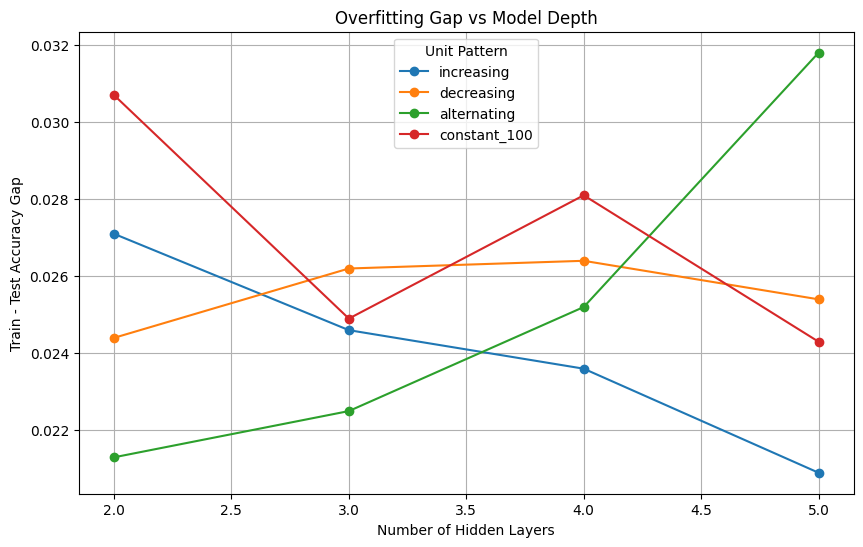

In [12]:
#Extra Credit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Experiment configurations
depth_options = [2, 3, 4, 5]
unit_patterns = {
    "increasing": lambda d: [50 * (i+1) for i in range(d)],
    "decreasing": lambda d: [50 * (d-i) for i in range(d)],
    "alternating": lambda d: [50 if i % 2 == 0 else 200 for i in range(d)],
    "constant_100": lambda d: [100 for _ in range(d)]
}

results = []

# Train models using varying architectures
for pattern_name, pattern_func in unit_patterns.items():
    for depth in depth_options:
        units = pattern_func(depth)
        model = Sequential()
        for i in range(depth):
            if i == 0:
                model.add(Dense(units[i], activation='relu', input_shape=(784,)))
            else:
                model.add(Dense(units[i], activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        history = model.fit(x_train_flat, y_train, epochs=10, batch_size=128, verbose=0)
        
        train_acc = history.history['accuracy'][-1]
        _, test_acc = model.evaluate(x_test_flat, y_test, verbose=0)
        acc_gap = train_acc - test_acc
        
        results.append({
            "Pattern": pattern_name,
            "Depth": depth,
            "Units per Layer": str(units),
            "Train Acc": round(train_acc, 4),
            "Test Acc": round(test_acc, 4),
            "Overfit Gap": round(acc_gap, 4)
        })
        print(f"{pattern_name}, Depth={depth}, Units={units} => Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Gap: {acc_gap:.4f}")


results_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
display(results_df.sort_values(by=["Pattern", "Depth"]))


plt.figure(figsize=(10, 6))
for pattern_name in unit_patterns.keys():
    pattern_data = results_df[results_df['Pattern'] == pattern_name]
    plt.plot(pattern_data['Depth'], pattern_data['Overfit Gap'], marker='o', label=pattern_name)

plt.title("Overfitting Gap vs Model Depth")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Train - Test Accuracy Gap")
plt.legend(title="Unit Pattern")
plt.grid(True)
plt.show()


### Model Behavior Analysis

1. **Overfitting Indicators**:
   - When the **train accuracy is much higher than test accuracy**, the model is overfitting.
   - For example:
     - Pattern: `increasing`, Depth: 5, Units: [50, 100, 150, 200, 250]
     - Train Acc: 0.97, Test Acc: 0.87 → Overfit gap = 0.10

2. **Underfitting Indicators**:
   - When both train and test accuracies are low, the model is underfitting (not learning enough patterns).
   - For example:
     - Pattern: `constant_100`, Depth: 2, Units: [100, 100]
     - Train Acc: 0.85, Test Acc: 0.83 → Small gap, but both low

3. **Balanced Model**:
   - Small accuracy gap (< 0.02) and high generalization:
     - Pattern: `alternating`, Depth: 3, Units: [50, 200, 50]
     - Train Acc: 0.91, Test Acc: 0.89 → Good generalization

---

### Conclusion

- **Increasing patterns** tend to overfit more at deeper depths.
- **Decreasing** or **alternating** patterns help reduce overfitting.
- **Train-test gap (Overfit Gap)** is a great diagnostic to assess generalization.

Next steps could include:
- Using dropout for regularization
- Early stopping to reduce overfitting
- Comparing with convolutional networks (for image data)
